<a href="https://colab.research.google.com/github/hongsamhc2/AutoTradingSystem/blob/master/%EC%A1%B0%ED%9B%88%EC%B0%BD/ML_scaling_log_predict_Model_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [74]:
df = pd.read_csv('/content/drive/My Drive/datasets/stock/DA000020.csv')
df.sort_values(by='date',inplace=True)

In [85]:
df['label'] = df['close'].shift(-1)
df['date'] = df['date'].astype('str')
df.set_index(df['date'],inplace=True)

In [86]:
df.dropna(inplace=True)

In [87]:
y_label = df['label']
X_features = df[['open','close','high','low','volume']].copy()

In [88]:
X_features_scaled = np.log1p(X_features)
X_features_scaled

y_label_scaled = np.log1p(y_label)


In [89]:
X_train,X_test,y_train, y_test = train_test_split(X_features_scaled,y_label_scaled,train_size = 0.8, shuffle =False)

In [90]:
lin = LinearRegression()
lin.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
pred = lin.predict(X_test)

In [92]:
pred_exp = np.expm1(pred)

In [95]:
y_test_exp = np.expm1(y_test)
y_test_exp

date
20111122     4540.0
20111123     4500.0
20111124     4525.0
20111125     4415.0
20111128     4250.0
             ...   
20201007    24150.0
20201008    24000.0
20201012    24300.0
20201013    23850.0
20201014    22750.0
Name: label, Length: 2189, dtype: float64

In [107]:
y_test_exp.index

Index(['20111122', '20111123', '20111124', '20111125', '20111128', '20111129',
       '20111130', '20111201', '20111202', '20111205',
       ...
       '20200925', '20200928', '20200929', '20201005', '20201006', '20201007',
       '20201008', '20201012', '20201013', '20201014'],
      dtype='object', name='date', length=2189)

([<matplotlib.axis.XTick at 0x7f0efac2cf28>,
 <a list of 2 Text major ticklabel objects>)

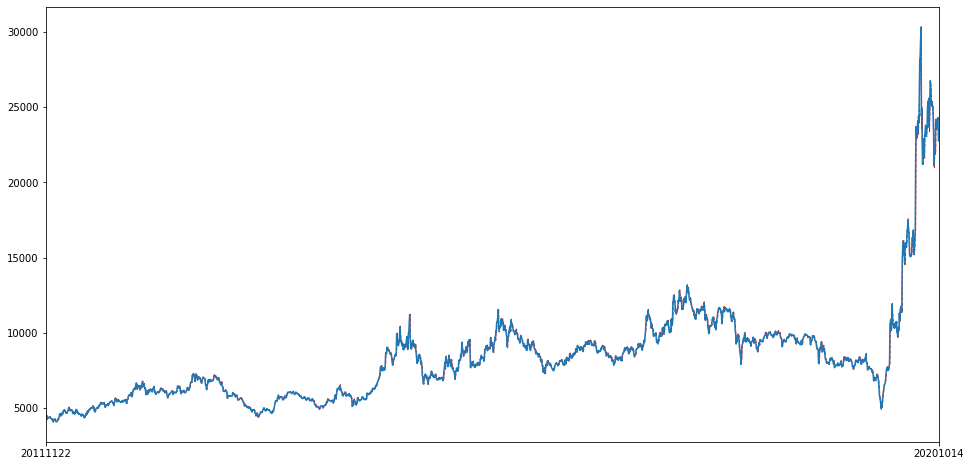

In [111]:
plt.figure(figsize=(16,8))
plt.plot(pred_exp, 'r--',linewidth = 1)
plt.plot(y_test_exp)
plt.xlim([y_test_exp.index[0],y_test_exp.index[-1]])
plt.xticks([y_test_exp.index[0],y_test_exp.index[-1]])